<a href="https://colab.research.google.com/github/KazuhisaHonma/ReadingRecord/blob/main/2nd_year_Python_students_scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Chapter1

##Lesson03

In [ ]:
import requests

url = 'https://www.ymori.com/books/python2nen/test1.html'
response = requests.get(url) #Webページのデータを取得する

response.encoding = response.apparent_encoding #文字化けしないようにする

print(response.text) #取得した文字列データを表示する

<!DOCTYPE html>
<html>
    <head>
        <meta charset="UTF-8">
        <title>Python2年生</title>
    </head>
    <body>
        <h2>第1章 Pythonでデータをダウンロード</h2>
        <ol>
            <li>スクレイピングってなに？</li>
            <li>Pythonをインストールしてみよう</li>
            <li>requestsでアクセスしてみよう</li>
        </ol>
    </body>
</html>


In [ ]:
filename = 'download.txt'
f = open(filename, mode='w') #ファイルを書き込みモードで開く

f.write(response.text) #インターネットから取得したデータを書き込んで

f.close() #ファイルを閉じる

In [ ]:
filename = 'download2.text'
with open(filename, mode='w') as f: #ファイルを書き込みモードで開いて
    f.write(response.text) #インターネットから取得したデータを書き込む

#Chapter2

##Lesson04

### HTMLを解析してみよう

In [ ]:
import requests
from bs4 import BeautifulSoup

load_url = 'https://www.ymori.com/books/python2nen/test1.html'
html = requests.get(load_url)
soup = BeautifulSoup(html.content, 'html.parser') #HTMLを解析する

#HTML全体を表示する
print(soup)

<!DOCTYPE html>

<html>
<head>
<meta charset="utf-8"/>
<title>Python2年生</title>
</head>
<body>
<h2>第1章 Pythonでデータをダウンロード</h2>
<ol>
<li>スクレイピングってなに？</li>
<li>Pythonをインストールしてみよう</li>
<li>requestsでアクセスしてみよう</li>
</ol>
</body>
</html>


In [ ]:
#title, h2, liタグを検索して表示する
print(soup.find('title').text) #.textを追加
print(soup.find('h2').text)
print(soup.find('li').text)

Python2年生
第1章 Pythonでデータをダウンロード
スクレイピングってなに？


In [ ]:
import requests
from bs4 import BeautifulSoup

load_url = 'https://www.ymori.com/books/python2nen/test2.html'
html = requests.get(load_url)
soup = BeautifulSoup(html.content, 'html.parser') #HTMLを解析する

# すべてのliタグを検索して、その文字列を表示する
for element in soup.find_all('li'):
    print(element.text)

スクレイピングってなに？
Pythonをインストールしてみよう
requestsでアクセスしてみよう
HTMLを解析してみよう
青空文庫の作品を取得してみよう
リンク一覧をファイルに書き出そう
画像を一括ダウンロードしよう


In [ ]:
import requests
from bs4 import BeautifulSoup

load_url = 'https://www.ymori.com/books/python2nen/test2.html'
html = requests.get(load_url)
soup = BeautifulSoup(html.content, 'html.parser') #HTMLを解析する

# IDで検索して、そのタグの中身を表示する
chap2 = soup.find(id='chap2')
print(chap2)

<div id="chap2">
<h2>第2章 HTMLを解析しよう</h2>
<ol>
<li>HTMLを解析してみよう</li>
<li>青空文庫の作品を取得してみよう</li>
<li>リンク一覧をファイルに書き出そう</li>
<li>画像を一括ダウンロードしよう</li>
</ol>
</div>


In [ ]:
import requests
from bs4 import BeautifulSoup
#Webページを取得して解析する
load_url = 'https://www.ymori.com/books/python2nen/test2.html'
html = requests.get(load_url)
soup = BeautifulSoup(html.content, 'html.parser')

#IDで検索し、その中のすべてのliタグを検索して表示する
chap2 = soup.find(id='chap2') #idが「chap2」を検索
for element in chap2.find_all('li'): #その中のliタグの文字列を表示
    print(element.text)

HTMLを解析してみよう
青空文庫の作品を取得してみよう
リンク一覧をファイルに書き出そう
画像を一括ダウンロードしよう


##Lesson05

### ニュースの最新記事一覧を取得してみよう

In [ ]:
import requests
from bs4 import BeautifulSoup

#Webページを取得して解析する
load_url = 'https://www.yahoo.co.jp'
html = requests.get(load_url)
soup = BeautifulSoup(html.content, 'html.parser')

#classで検索し、その中のすべてのaタグを検索して表示する
topic = soup.find(class_='_1XAfHUWtx6tfYZuWDVjNxZ')#classが「topics」を検索
for element in topic.find_all('li'): #その中のaタグの文字列を表示
    print(element.text)

総裁選でヤキモキ 推薦人なぜ20人
高市氏が出馬表明 国力の強化訴え
維新 兵庫知事に出直し選挙求めるNEW
ハワイアンズ運営会社にTOBNEW
フリーザ姿でゴミ拾い 300日超えNEW
昭和99年9月9日 SNS投稿相次ぐNEW
レース事故で21歳ライダー死亡
異色のプロ野球選手 公務員に転身


##Lesson06

In [ ]:
import requests
from bs4 import BeautifulSoup
import urllib

#Webページを取得して解析する
load_url = 'https://www.ymori.com/books/python2nen/test2.html'
html = requests.get(load_url)
soup = BeautifulSoup(html.content, 'html.parser')

#すべてのaタグを検索して、リンクを表示する
for element in soup.find_all('a'):
    print(element.text)
    url = element.get('href')
    link_url = urllib.parse.urljoin(load_url, url)
    print(link_url)

リンク1
https://www.ymori.com/books/python2nen/test1.html
リンク2
https://www.ymori.com/books/python2nen/test3.html


In [ ]:
soup

<!DOCTYPE html>

<html>
<head>
<meta charset="utf-8"/>
<title>Python2年生</title>
</head>
<body>
<div id="chap1">
<h2>第1章 Pythonでデータをダウンロード</h2>
<ol>
<li>スクレイピングってなに？</li>
<li>Pythonをインストールしてみよう</li>
<li>requestsでアクセスしてみよう</li>
</ol>
</div>
<div id="chap2">
<h2>第2章 HTMLを解析しよう</h2>
<ol>
<li>HTMLを解析してみよう</li>
<li>青空文庫の作品を取得してみよう</li>
<li>リンク一覧をファイルに書き出そう</li>
<li>画像を一括ダウンロードしよう</li>
</ol>
</div>
<a href="https://www.ymori.com/books/python2nen/test1.html">リンク1</a>
<a href="./test3.html">リンク2</a><br/>
<img src="https://www.ymori.com/books/python2nen/sample1.png"/>
<img src="./sample2.png"/>
<img src="./sample3.png"/>
</body>
</html>

In [ ]:
import requests
from bs4 import BeautifulSoup
import urllib

#Webページを取得して解析する
load_url = 'https://www.ymori.com/books/python2nen/test2.html'
html = requests.get(load_url)
soup = BeautifulSoup(html.content, 'html.parser')

#ファイルを書き込みモードで開く
filename = 'linklist.text'
with open(filename, 'w') as f:
    #すべてのaタグを検索し、リンクを絶対URLで書き出す
    for element in soup.find_all('a'):
        url = element.get('href')
        link_url = urllib.parse.urljoin(load_url, url)
        f.write(element.text+'\n')
        f.write(link_url+'\n')
        f.write('\n')

##Lesson07

###画像を一括ダウンロードしよう

In [ ]:
import requests
from pathlib import Path

# 保存用ファイルを作る
out_folder = Path('download')
out_folder.mkdir(exist_ok=True) #'dowmload'フォルダを作成

#画像ファイルを取得する
image_url = 'https://www.ymori.com/books/python2nen/sample1.png'
imgdata = requests.get(image_url)

#URLから最後のファイル名を取り出して、保存フォルダ名と繋げる
filename = image_url.split('/')[-1]
out_path = out_folder.joinpath(filename)

#画像データを、ファイルに書き出す
with open(out_path, mode='wb') as f: #バイナリーモードで開いて
    f.write(imgdata.content) # 画像データを書き込む

###すべてのimgタグの画像ファイルURLを表示する

In [ ]:
import requests
from bs4 import BeautifulSoup
import urllib

#Webページを取得して解析する
load_url = 'https://www.ymori.com/books/python2nen/test2.html'
html = requests.get(load_url)
soup = BeautifulSoup(html.content, 'html.parser')

urls = []
images = []

#すべてのimgタグを検索し、リンクを取得する
for element in soup.find_all('img'):
    src = element.get('src')

    #絶対URLと、ファイルを表示する
    image_url = urllib.parse.urljoin(load_url, src)
    filename = image_url.split('/')[-1]
    print(image_url, '>>', filename)
    images.append(filename)
    urls.append(image_url)

https://www.ymori.com/books/python2nen/sample1.png >> sample1.png
https://www.ymori.com/books/python2nen/sample2.png >> sample2.png
https://www.ymori.com/books/python2nen/sample3.png >> sample3.png


In [ ]:
#pandasに変換する
import pandas as pd

Data = {
    'URL':urls,
    'imge_name':images
}
df = pd.DataFrame(Data, index=range(len(images)))
df

,URL,imge_name
0,https://www.ymori.com/books/python2nen/sample1...,sample1.png
1,https://www.ymori.com/books/python2nen/sample2...,sample2.png
2,https://www.ymori.com/books/python2nen/sample3...,sample3.png


###ページ内の画像を一括ダウンロードするプログラム

In [ ]:
import requests
from bs4 import BeautifulSoup
from pathlib import Path
import urllib
import time

#Webページを取得して解析する
load_url = 'https://www.ymori.com/books/python2nen/test2.html'
html = requests.get(load_url)
soup = BeautifulSoup(html.content, 'html.parser')

#保存用フォルダを作る
out_folder = Path('download2')
out_folder.mkdir(exist_ok=True)

#すべてのimgタグを検索し、リンクを取得する
for element in soup.find_all('img'):
    src = element.get('src')

    #絶対URLを作って、画像データを取得する
    image_url = urllib.parse.urljoin(load_url, src)
    imgdata = requests.get(image_url)

    #URLから最後のファイル名を取り出して、保存フォルダ名とつなげる
    filename  = image_url.split('/')[-1]
    out_path = out_folder.joinpath(filename)

    #画像データを、ファイルに書き出す
    with open(out_path, mode='wb') as f:
        f.write(imgdata.content)

    #1回アクセスしたので1秒待つ
    time.sleep(1)

#Chapter3

##Lesson08

###pandasを使ってみよう

In [ ]:
import pandas as pd

df = pd.read_csv('file path')
df.head()

,名前,国語,数学,英語,理科,社会
0,A太,83,89,76,97,76
1,B介,66,93,75,88,76
2,C子,100,84,96,82,94
3,D郎,60,73,63,52,70
4,E美,92,62,84,80,78


In [ ]:
print('データの件数　＝', len(df))
print('項目名　＝', df.columns.values)
print('インデックス　＝', df.index.values)

データの件数　＝ 6
項目名　＝ ['名前' '国語' '数学' '英語' '理科' '社会']
インデックス　＝ [0 1 2 3 4 5]


In [ ]:
# 1列のデータを表示
print('国語の列データ\n', df['国語'])
# 複数の列のデータを表示
print('国語と数学の列データ\n', df[['国語', '数学']])

国語の列データ
 0     83
1     66
2    100
3     60
4     92
5     96
Name: 国語, dtype: int64
国語と数学の列データ
     国語  数学
0   83  89
1   66  93
2  100  84
3   60  73
4   92  62
5   96  92


In [ ]:
# 1行のデータを表示
print('C子のデータ\n', df.loc[2])

# 複数の行のデータを表示
print('C子とD郎のデータ\n', df.loc[[2,3]])

# 指定した行の指定した列のデータを表示
print('C子の国語データ\n', df.loc[2]['国語'])

C子のデータ
 名前     C子
国語    100
数学     84
英語     96
理科     82
社会     94
Name: 2, dtype: object
C子とD郎のデータ
    名前   国語  数学  英語  理科  社会
2  C子  100  84  96  82  94
3  D郎   60  73  63  52  70
C子の国語データ
 100


In [ ]:
# 1列のデータを追加
df['美術'] = [68,73,82,77,94,96]
print('列データ（美術）を追加\n')
df

列データ（美術）を追加



,名前,国語,数学,英語,理科,社会,美術
0,A太,83,89,76,97,76,68
1,B介,66,93,75,88,76,73
2,C子,100,84,96,82,94,82
3,D郎,60,73,63,52,70,77
4,E美,92,62,84,80,78,94
5,F菜,96,92,94,92,90,96


In [ ]:
# 1行データを追加
df.loc[6] = ['G恵', 90,92,94,96,92,98]
print('行データ（G恵）を追加')
df

行データ（G恵）を追加


,名前,国語,数学,英語,理科,社会,美術
0,A太,83,89,76,97,76,68
1,B介,66,93,75,88,76,73
2,C子,100,84,96,82,94,82
3,D郎,60,73,63,52,70,77
4,E美,92,62,84,80,78,94
5,F菜,96,92,94,92,90,96
6,G恵,90,92,94,96,92,98


### 列データ、行データを削除する

In [ ]:
# [名前]の列を削除
# print('[名前]の列を削除\n', df.drop('名前', axis=1))
print('[名前]の列を削除\n')
df.drop('名前', axis=1, inplace=True)
df

[名前]の列を削除



,国語,数学,英語,理科,社会,美術
0,83,89,76,97,76,68
1,66,93,75,88,76,73
2,100,84,96,82,94,82
3,60,73,63,52,70,77
4,92,62,84,80,78,94
5,96,92,94,92,90,96
6,90,92,94,96,92,98


In [ ]:
# インデックス2の行を削除
print('インデックス2の行を削除\n')
df.drop(2, axis=0, inplace=True)
df

インデックス2の行を削除



,国語,数学,英語,理科,社会,美術
0,83,89,76,97,76,68
1,66,93,75,88,76,73
3,60,73,63,52,70,77
4,92,62,84,80,78,94
5,96,92,94,92,90,96
6,90,92,94,96,92,98


##Lesson09

In [ ]:
import pandas as pd

# CSVファイルの読み込み
df = pd.read_csv('file path')

# 条件に合うデータを抽出する
data_s = df[df['国語'] >= 90]
print('国語が90点以上\n', data_s)

data_c = df[df['数学'] < 70]
print('数学が70点未満\n', print(data_c))

国語が90点以上
    名前   国語  数学  英語  理科  社会
2  C子  100  84  96  82  94
4  E美   92  62  84  80  78
5  F菜   96  92  94  92  90
   名前  国語  数学  英語  理科  社会
4  E美  92  62  84  80  78
数学が70点未満
 None


### データを集計する

In [ ]:
print('数学の最高点 = ', df['数学'].max())
print('数学の最低点 = ', df['数学'].min())
print('数学の平均点 = ', df['数学'].mean())
print('数学の中央値 = ', df['数学'].median())
print('数学の合計 = ', df['数学'].sum())

数学の最高点 =  93
数学の最低点 =  62
数学の平均点 =  82.16666666666667
数学の中央値 =  86.5
数学の合計 =  493


### データを並べ替える

In [ ]:
kokugo = df.sort_values('国語',ascending=False)
print('国語の点数が高いもの順でソート')
kokugo

国語の点数が高いもの順でソート


,名前,国語,数学,英語,理科,社会
2,C子,100,84,96,82,94
5,F菜,96,92,94,92,90
4,E美,92,62,84,80,78
0,A太,83,89,76,97,76
1,B介,66,93,75,88,76
3,D郎,60,73,63,52,70


### 列と行を入れ替える

In [ ]:
print('行と列を入れ替える')
df.T

行と列を入れ替える


,0,1,2,3,4,5
名前,A太,B介,C子,D郎,E美,F菜
国語,83,66,100,60,92,96
数学,89,93,84,73,62,92
英語,76,75,96,63,84,94
理科,97,88,82,52,80,92
社会,76,76,94,70,78,90


In [ ]:
# データをリスト化する
df.values

array([['A太', 83, 89, 76, 97, 76],
       ['B介', 66, 93, 75, 88, 76],
       ['C子', 100, 84, 96, 82, 94],
       ['D郎', 60, 73, 63, 52, 70],
       ['E美', 92, 62, 84, 80, 78],
       ['F菜', 96, 92, 94, 92, 90]], dtype=object)

In [ ]:
df = pd.read_csv('file path')

# ソート（国語の点数が高いもの順）
kokugo = df.sort_values('国語', ascending=False)

# csvファイルに出力する
kokugo.to_csv('export1.csv')

In [ ]:
df = pd.read_csv('file path')

# ソート（国語の点数が高いもの順）
kokugo = df.sort_values('国語', ascending=False)

# csvファイルに出力する(インデックスを削除)
kokugo.to_csv('export2.csv', index=False)

In [ ]:
df = pd.read_csv('file path')

# ソート（国語の点数が高いもの順）
kokugo = df.sort_values('国語', ascending=False)

# csvファイルに出力する(インデックスとヘッダーを削除)
kokugo.to_csv('export3.csv', index=False, header=False)

##Lesson10

### グラフで表示してみよう

In [ ]:
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 44.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=b2eba9aa8d5864c93691dff8466ce40ce9e73fe9b5c9d7929c03c994ba02d1fe
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


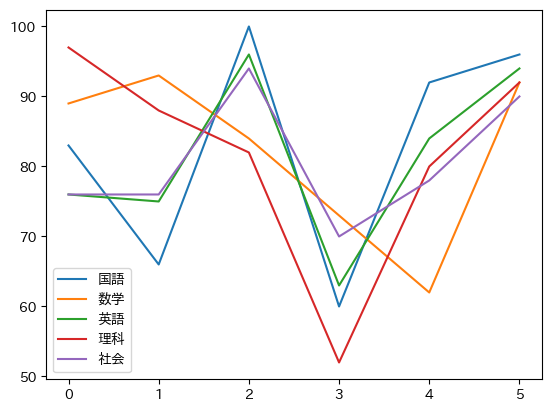

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib

# CSVファイルを読み込む
df = pd.read_csv('file path')

# グラフで表示する
df.plot()
plt.show()

### 棒グラフを作る

In [ ]:
df.head()

,国語,数学,英語,理科,社会
名前,,,,,
A太,83,89,76,97,76
B介,66,93,75,88,76
C子,100,84,96,82,94
D郎,60,73,63,52,70
E美,92,62,84,80,78


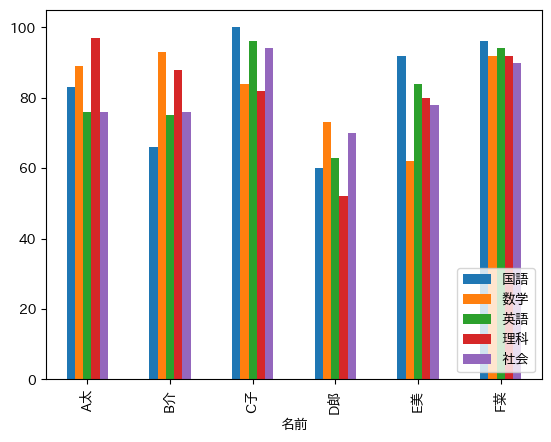

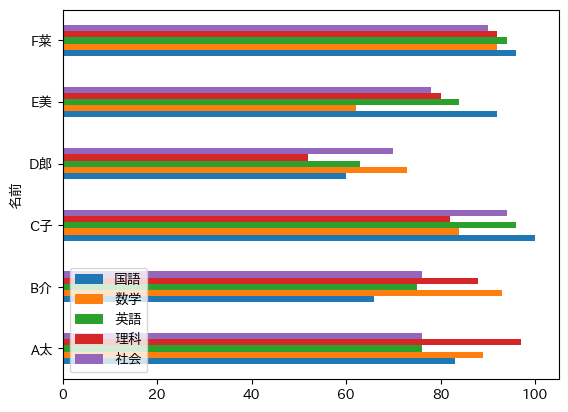

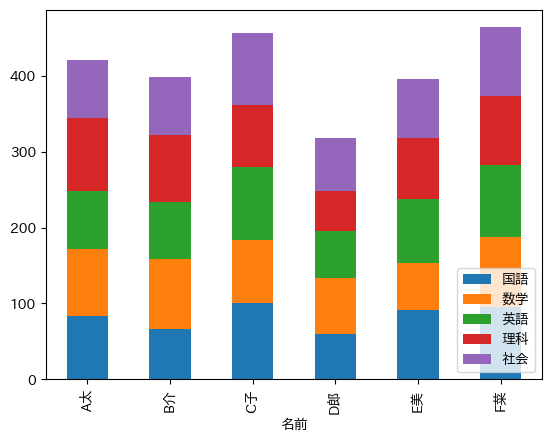

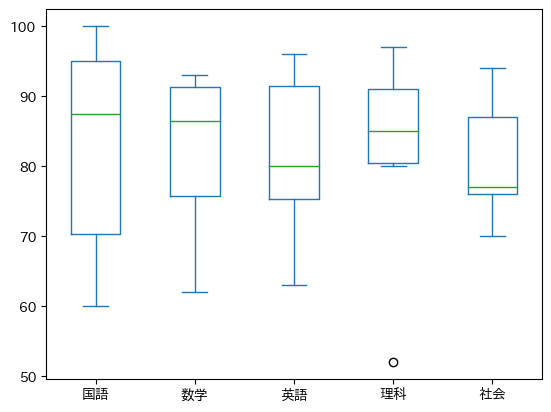

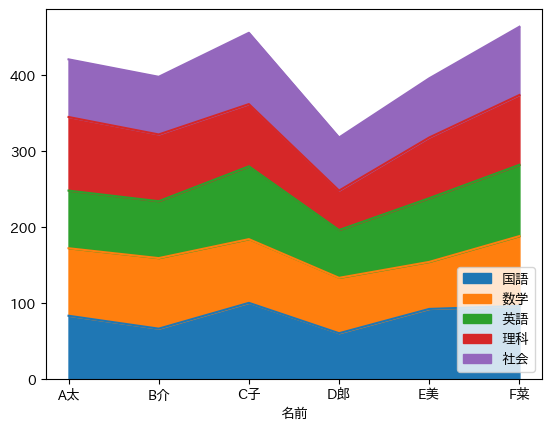

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib

# CSVファイルを読み込む
df = pd.read_csv('file path',
                 index_col = 0)

# 棒グラフを作って表示する
df.plot.bar()
plt.legend(loc='lower right')
plt.show()

# 棒グラフ（水平）を作って表示する
df.plot.barh()
plt.legend(loc='lower left')
plt.show()

# 積み上げ棒グラフを作って表示する
df.plot.bar(stacked=True)
plt.legend(loc='lower right')
plt.show()

# 箱ひげグラフを作って表示する
df.plot.box()
plt.show()

# 面グラフを作って表示する
df.plot.area()
plt.legend(loc='lower right')
plt.savefig('area.png')
plt.show()


### 個別のデータをグラフで表示する

In [ ]:
df

,国語,数学,英語,理科,社会
名前,,,,,
A太,83,89,76,97,76
B介,66,93,75,88,76
C子,100,84,96,82,94
D郎,60,73,63,52,70
E美,92,62,84,80,78
F菜,96,92,94,92,90


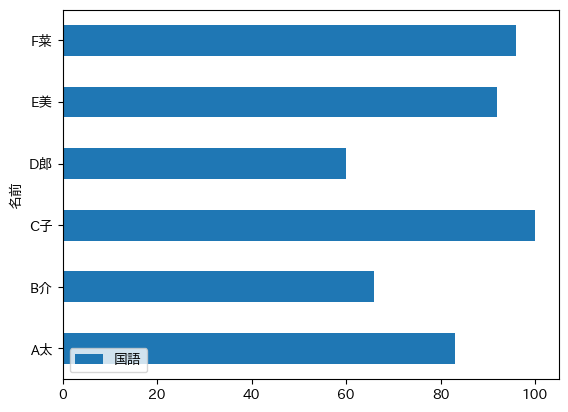

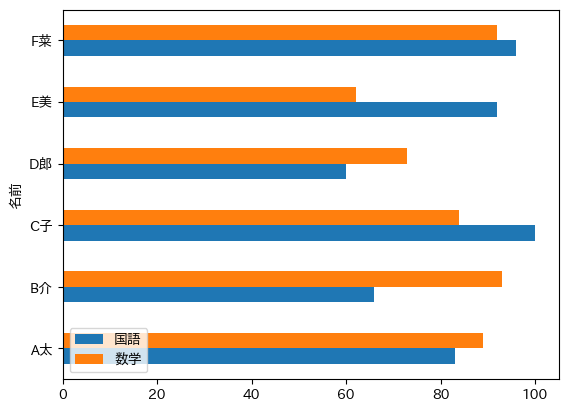

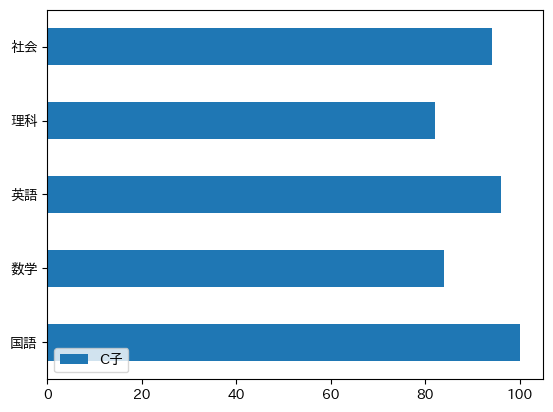

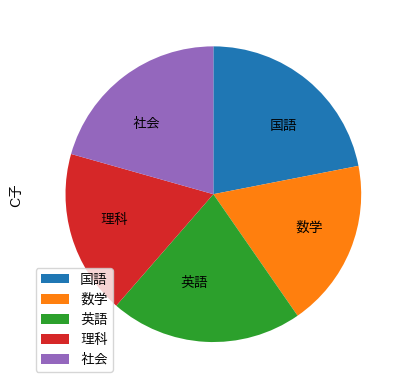

In [ ]:
# 国語の棒グラフを作って表示する
df['国語'].plot.barh()
plt.legend(loc='lower left')
plt.show()

# 国語と数学の棒グラフを作って表示する
df[['国語', '数学']].plot.barh()
plt.legend(loc='lower left')
plt.show()

# C子の棒グラフを作って表示する
df.loc['C子'].plot.barh()
plt.legend(loc='lower left')
plt.show()

# C子の円グラフを作って表示する
df.loc['C子'].plot.pie(counterclock=False, startangle=90,labeldistance=0.6)
plt.legend(loc='lower left')
plt.show()

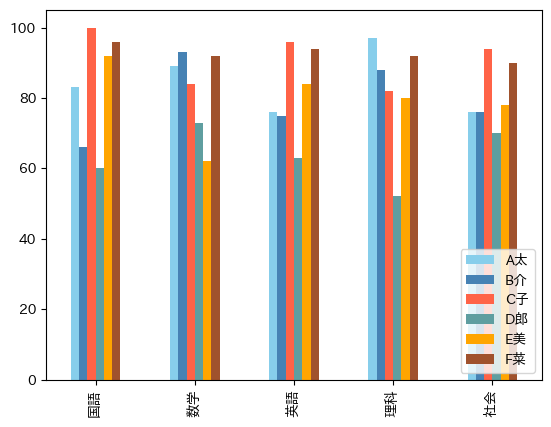

In [ ]:
df = pd.read_csv('file path',
                 index_col = 0)

# 棒グラフを作って表示する
colorlist = ['skyblue', 'steelblue', 'tomato', 'cadetblue', 'orange', 'sienna']
df.T.plot.bar(color = colorlist)
plt.legend(loc='lower right')
plt.show()

### 棒グラフを画像ファイル出力する

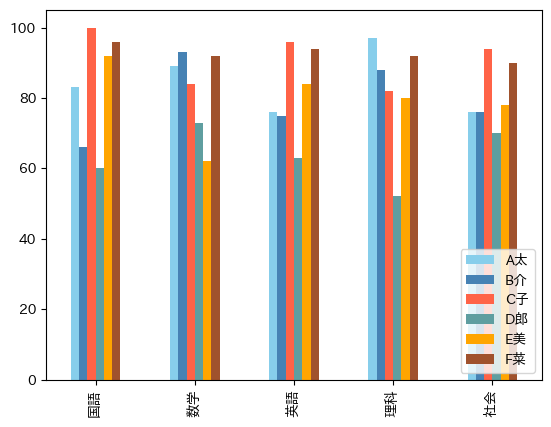

In [ ]:
df = pd.read_csv('file path',
                 index_col = 0)

# 棒グラフを作って表示する
colorlist = ['skyblue', 'steelblue', 'tomato', 'cadetblue', 'orange', 'sienna']
df.T.plot.bar(color = colorlist)
plt.legend(loc='lower right')
plt.savefig('bargraph.png') #　グラフを画像ファイルとして出力

## Lesson11

### Excelファイルを読み書きしてみよう

In [ ]:
import pandas as pd
import openpyxl

# CSVファイルを読み込む
df = pd.read_csv('file path')

# ソート（国語の点数が高いもの順）
kokugo  = df.sort_values('国語', ascending=False)

# Excelファイルに出力する
kokugo.to_excel('csv_to_excell.xlsx')

In [ ]:
import pandas as pd
import openpyxl

# CSVファイルを読み込む
df = pd.read_csv('file path')

# ソート（国語の点数が高いもの順）
kokugo  = df.sort_values('国語', ascending=False)

# Excelファイルに出力する
kokugo.to_excel('csv_to_excell2.xlsx', index=False, sheet_name='国語でソート')

### 複数のシートを1つのExcelファイルに出力する

In [ ]:
import pandas as pd
import openpyxl

# CSVファイルを読み込む
df = pd.read_csv('file path')

# ソート（国語の点数が高いもの順）
kokugo  = df.sort_values('国語', ascending=False)

# 1つのExcelファイルに複数のシートで出力する
with pd.ExcelWriter('csv_to_excel3.xlsx') as writer:
    df.to_excel(writer, index=False, sheet_name='Sheet1')
    kokugo.to_excel(writer, index=False, sheet_name='国語でソート')

In [ ]:
# Excelファイルを読み込む
df = pd.read_excel('csv_to_excel3.xlsx')
df

,名前,国語,数学,英語,理科,社会
0,A太,83,89,76,97,76
1,B介,66,93,75,88,76
2,C子,100,84,96,82,94
3,D郎,60,73,63,52,70
4,E美,92,62,84,80,78
5,F菜,96,92,94,92,90


In [ ]:
df = pd.read_excel('csv_to_excel3.xlsx', sheet_name='国語でソート')
df

,名前,国語,数学,英語,理科,社会
0,C子,100,84,96,82,94
1,F菜,96,92,94,92,90
2,E美,92,62,84,80,78
3,A太,83,89,76,97,76
4,B介,66,93,75,88,76
5,D郎,60,73,63,52,70


In [ ]:
# すべてのシートを読み込む
df_all = pd.read_excel('csv_to_excel3.xlsx', sheet_name=None)
df_all.keys()

dict_keys(['Sheet1', '国語でソート'])

# Chapter4

## Lesson13

In [ ]:
df = pd.read_csv('file path',
              header=None, encoding='shift-jis')
print(len(df))
print(df.columns.values)

3887
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,13101,100,1000000,ﾄｳｷｮｳﾄ,ﾁﾖﾀﾞｸ,ｲｶﾆｹｲｻｲｶﾞﾅｲﾊﾞｱｲ,東京都,千代田区,以下に掲載がない場合,0,0,0,0,0,0
1,13101,102,1020072,ﾄｳｷｮｳﾄ,ﾁﾖﾀﾞｸ,ｲｲﾀﾞﾊﾞｼ,東京都,千代田区,飯田橋,0,0,1,0,0,0
2,13101,102,1020082,ﾄｳｷｮｳﾄ,ﾁﾖﾀﾞｸ,ｲﾁﾊﾞﾝﾁｮｳ,東京都,千代田区,一番町,0,0,0,0,0,0
3,13101,101,1010032,ﾄｳｷｮｳﾄ,ﾁﾖﾀﾞｸ,ｲﾜﾓﾄﾁｮｳ,東京都,千代田区,岩本町,0,0,1,0,0,0
4,13101,101,1010047,ﾄｳｷｮｳﾄ,ﾁﾖﾀﾞｸ,ｳﾁｶﾝﾀﾞ,東京都,千代田区,内神田,0,0,1,0,0,0


### データを抽出する

In [ ]:
# [2]の列が[1600006]の住所を抽出して表示
results = df[df[2] == 1600006]
print(results[[2,6,7,8]])
results.head()

            2    6    7   8
2207  1600006  東京都  新宿区  舟町


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
2207,13104,160,1600006,ﾄｳｷｮｳﾄ,ｼﾝｼﾞｭｸｸ,ﾌﾅﾏﾁ,東京都,新宿区,舟町,0,0,0,0,0,0


### 部分的に一致するものを抽出

In [ ]:
# [8]の列が[四谷]の住所を抽出して表示
results = df[df[8] == '四谷']
results.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
2217,13104,160,1600004,ﾄｳｷｮｳﾄ,ｼﾝｼﾞｭｸｸ,ﾖﾂﾔ,東京都,新宿区,四谷,0,0,1,0,0,0
3385,13206,183,1830035,ﾄｳｷｮｳﾄ,ﾌﾁｭｳｼ,ﾖﾂﾔ,東京都,府中市,四谷,0,0,1,0,0,0


In [ ]:
# [8]の列に[四谷]の文字が含まれている住所を抽出して表示
results = df[df[8].str.contains('四谷')]
results.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
2217,13104,160,1600004,ﾄｳｷｮｳﾄ,ｼﾝｼﾞｭｸｸ,ﾖﾂﾔ,東京都,新宿区,四谷,0,0,1,0,0,0
2218,13104,160,1600002,ﾄｳｷｮｳﾄ,ｼﾝｼﾞｭｸｸ,ﾖﾂﾔｻｶﾏﾁ,東京都,新宿区,四谷坂町,0,0,0,0,0,0
2219,13104,160,1600008,ﾄｳｷｮｳﾄ,ｼﾝｼﾞｭｸｸ,ﾖﾂﾔｻﾝｴｲﾁｮｳ,東京都,新宿区,四谷三栄町,0,0,0,0,0,0
2220,13104,160,1600003,ﾄｳｷｮｳﾄ,ｼﾝｼﾞｭｸｸ,ﾖﾂﾔﾎﾝｼｵﾁｮｳ,東京都,新宿区,四谷本塩町,0,0,0,0,0,0
3258,13201,193,1930813,ﾄｳｷｮｳﾄ,ﾊﾁｵｳｼﾞｼ,ﾖﾂﾔﾏﾁ,東京都,八王子市,四谷町,0,0,0,0,0,0


## Lesson14

### e-Stst:政府統計の総合窓口

In [ ]:
df = pd.read_csv('file path',
                 index_col='全国・都道府県', encoding='shift-jis')
print(len(df))
print(df.columns.values)

48
['表章項目' '男女別' '人口' '/時間軸（年）' '平成22年' '平成27年' '平成28年' '平成29年' '平成30年']


In [ ]:
df.head()

,表章項目,男女別,人口,/時間軸（年）,平成22年,平成27年,平成28年,平成29年,平成30年
全国・都道府県,,,,,,,,,
全国,人口【千人】,男女計,総人口,NaN,"128,057","127,095","126,933","126,706","126,443"
北海道,人口【千人】,男女計,総人口,NaN,"5,506","5,382","5,352","5,320","5,286"
青森県,人口【千人】,男女計,総人口,NaN,"1,373","1,308","1,293","1,278","1,263"
岩手県,人口【千人】,男女計,総人口,NaN,"1,330","1,280","1,268","1,255","1,241"
宮城県,人口【千人】,男女計,総人口,NaN,"2,348","2,334","2,330","2,323","2,316"


### データをグラフで表示する

In [ ]:
print(df['平成30年'])
# 平成30年の列データで棒グラフを作って表示する
df['平成30年'].plot.bar()
plt.show()

全国・都道府県
全国      126,443
北海道       5,286
青森県       1,263
岩手県       1,241
宮城県       2,316
秋田県         981
山形県       1,090
福島県       1,864
茨城県       2,877
栃木県       1,946
群馬県       1,952
埼玉県       7,330
千葉県       6,255
東京都      13,822
神奈川県      9,177
新潟県       2,246
富山県       1,050
石川県       1,143
福井県         774
山梨県         817
長野県       2,063
岐阜県       1,997
静岡県       3,659
愛知県       7,537
三重県       1,791
滋賀県       1,412
京都府       2,591
大阪府       8,813
兵庫県       5,484
奈良県       1,339
和歌山県        935
鳥取県         560
島根県         680
岡山県       1,898
広島県       2,817
山口県       1,370
徳島県         736
香川県         962
愛媛県       1,352
高知県         706
福岡県       5,107
佐賀県         819
長崎県       1,341
熊本県       1,757
大分県       1,144
宮崎県       1,081
鹿児島県      1,614
沖縄県       1,448
Name: 平成30年, dtype: object


TypeError: no numeric data to plot

全国・都道府県
全国      126443
北海道       5286
青森県       1263
岩手県       1241
宮城県       2316
秋田県        981
山形県       1090
福島県       1864
茨城県       2877
栃木県       1946
群馬県       1952
埼玉県       7330
千葉県       6255
東京都      13822
神奈川県      9177
新潟県       2246
富山県       1050
石川県       1143
福井県        774
山梨県        817
長野県       2063
岐阜県       1997
静岡県       3659
愛知県       7537
三重県       1791
滋賀県       1412
京都府       2591
大阪府       8813
兵庫県       5484
奈良県       1339
和歌山県       935
鳥取県        560
島根県        680
岡山県       1898
広島県       2817
山口県       1370
徳島県        736
香川県        962
愛媛県       1352
高知県        706
福岡県       5107
佐賀県        819
長崎県       1341
熊本県       1757
大分県       1144
宮崎県       1081
鹿児島県      1614
沖縄県       1448
Name: 平成30年, dtype: int64


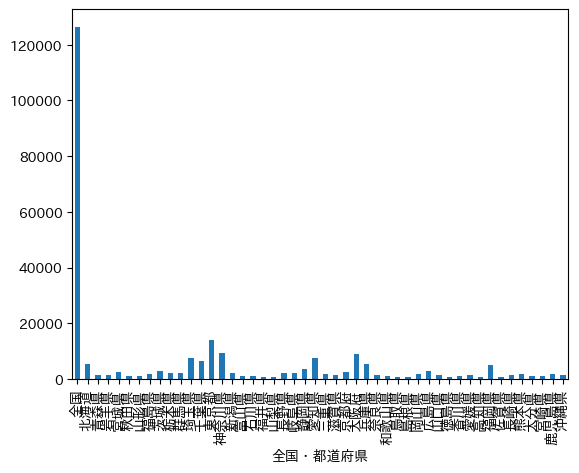

In [ ]:
# 平成30年の列データで棒グラフを作って表示する
df['平成30年'] = pd.to_numeric(df['平成30年'].str.replace(',', ''))
print(df['平成30年'])
df['平成30年'].plot.bar()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

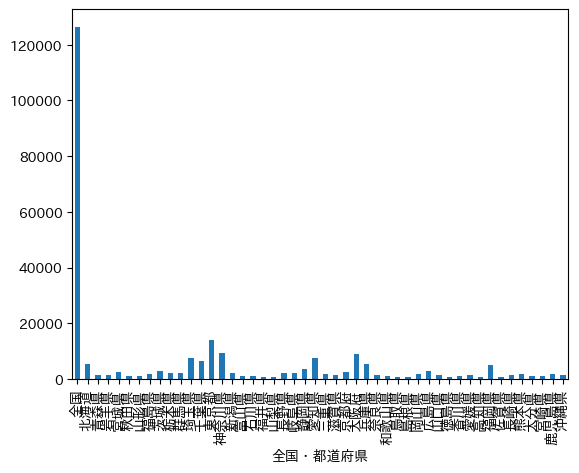

In [ ]:
# 違う書き方
df = pd.read_csv('file path',
                 index_col='全国・都道府県', encoding='shift-jis')

df['平成30年'] = df['平成30年'].str.replace(',', '').astype(int)

# 平成30年の列データで棒グラフを作って表示する
df['平成30年'].plot.bar()
plt.show

### グラフを表示する画面サイズを指定する

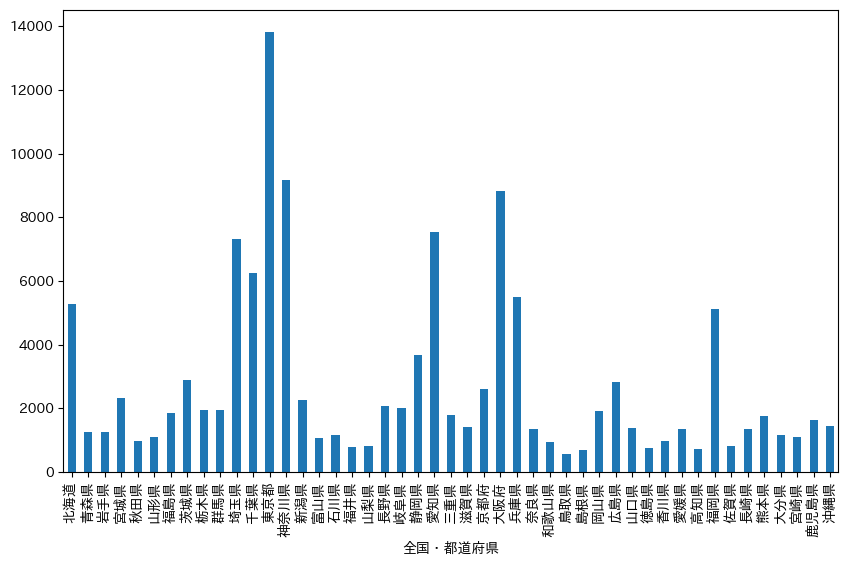

In [ ]:
df = pd.read_csv('file path',
                 index_col='全国・都道府県', encoding='shift-jis')

# 平成30年の列データで棒グラフを作って表示する
df = df.drop('全国', axis=0)
df['平成30年'] = pd.to_numeric(df['平成30年'].str.replace(',',''))
df['平成30年'].plot.bar(figsize=(10,6))
plt.show()

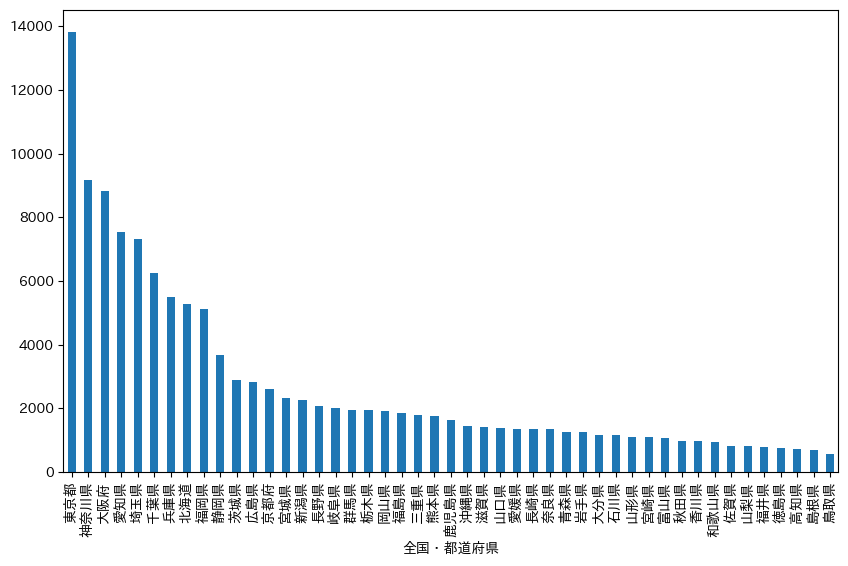

In [ ]:
df = pd.read_csv('file path',
                 index_col='全国・都道府県', encoding='shift-jis')

# 平成30年の列データで棒グラフを作って表示する
df = df.drop('全国', axis=0)
df['平成30年'] = df['平成30年'].str.replace(',', '').astype(int)
df = df.sort_values('平成30年', ascending=False)
df['平成30年'].plot.bar(figsize=(10,6))
plt.show()

### 2つの列データの差を新しい列として作る

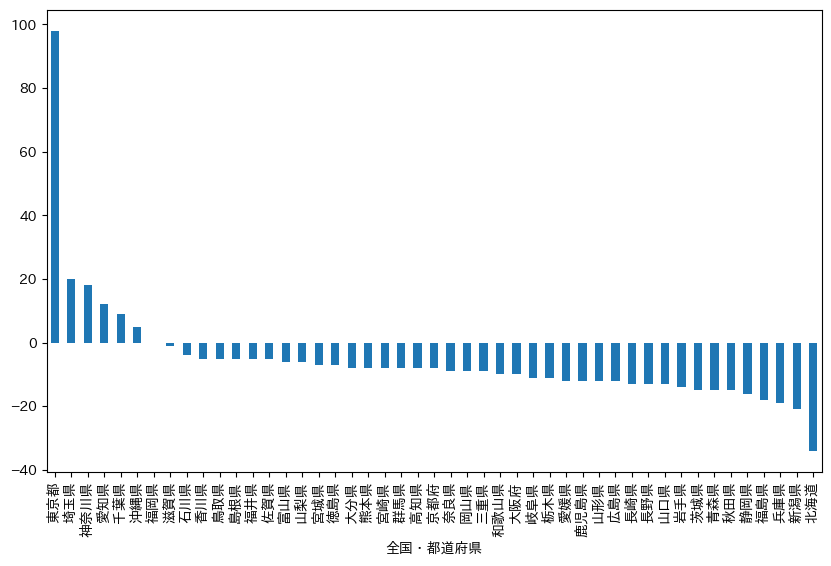

In [ ]:
df = pd.read_csv('file path',
                 index_col='全国・都道府県', encoding='shift-jis')
df = df.drop('全国', axis=0)

# 平成30年の列データで棒グラフを作って表示する
df['平成29年'] = df['平成29年'].str.replace(',', '').astype(int)
df['平成30年'] = df['平成30年'].str.replace(',', '').astype(int)
df['人口増減'] = df['平成30年'] - df['平成29年']
df = df.sort_values('人口増減', ascending=False)
df['人口増減'].plot.bar(figsize=(10,6))
plt.show()

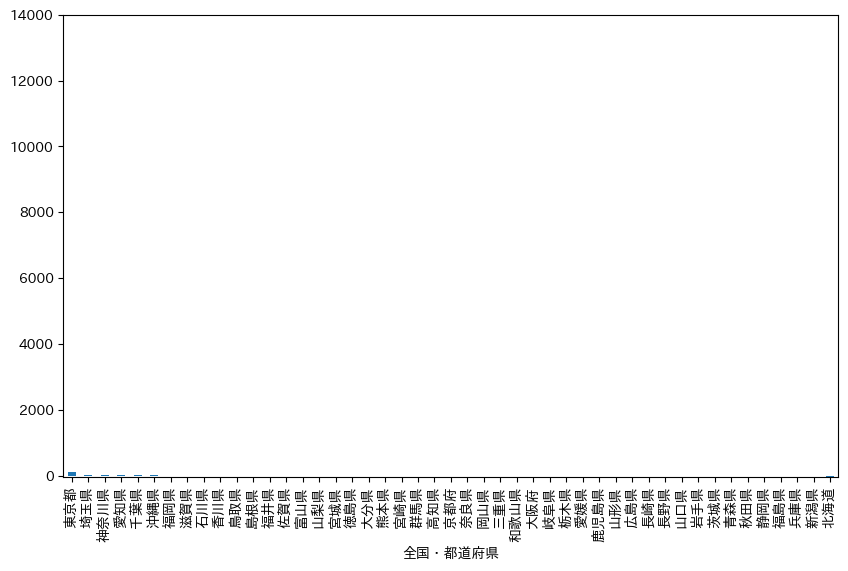

In [ ]:
df = pd.read_csv('file path',
                 index_col='全国・都道府県', encoding='shift-jis')
df = df.drop('全国', axis=0)

# 平成30年の列データで棒グラフを作って表示する
df['平成29年'] = df['平成29年'].str.replace(',', '').astype(int)
df['平成30年'] = df['平成30年'].str.replace(',', '').astype(int)
df['人口増減'] = df['平成30年'] - df['平成29年']
df = df.sort_values('人口増減', ascending=False)
df['人口増減'].plot.bar(figsize=(10,6))
plt.ylim(-40, 14000) #縦軸のスケール設定
plt.show()

## Lesson15

### キッズすたっと：探そう統計データ

In [ ]:
import pandas as pd

# データフレームを読み込む
df1 = pd.read_csv('file path',
                  index_col='時点')
df2 = pd.read_csv('file path',
                  index_col='時点')
df3 = pd.read_csv('file path',
                  index_col='時点')

print(df1.columns.values)
print(df2.columns.values)
print(df3.columns.values)

['地域コード' '地域' '年平均気温【℃】' '注記']
['地域コード' '地域' '最高気温（日最高気温の月平均の最高値）【℃】' '注記']
['地域コード' '地域' '最低気温（日最低気温の月平均の最低値）【℃】' '注記']


In [ ]:
df1.head()

,地域コード,地域,年平均気温【℃】,注記
時点,,,,
2008年,13000,東京都,16.4,NaN
2009年,13000,東京都,16.7,NaN
2010年,13000,東京都,16.9,NaN
2011年,13000,東京都,16.5,NaN
2012年,13000,東京都,16.3,NaN


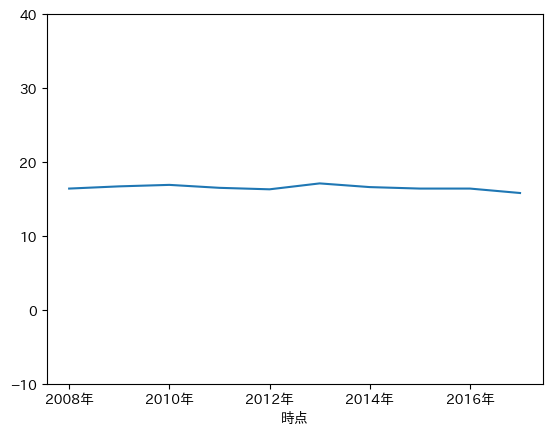

In [ ]:
# 平均気温で折れ線グラフを表示
df1['年平均気温【℃】'].plot()
plt.ylim(-10,40)
plt.show()

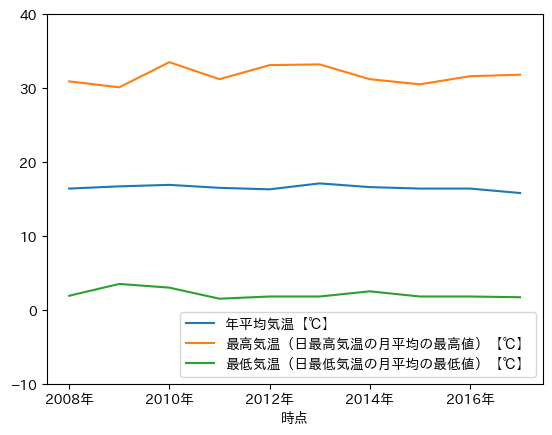

In [ ]:
# 3つのグラフを重ねて表示
df1['年平均気温【℃】'].plot()
df2['最高気温（日最高気温の月平均の最高値）【℃】'].plot()
df3['最低気温（日最低気温の月平均の最低値）【℃】'].plot()
plt.ylim(-10,40)
plt.legend(loc='lower right')
plt.show()

## Lesson16

### 自治体のデータ：データシティ鯖江

In [ ]:
import pandas as pd

df = pd.read_csv('file path',
                 encoding='shift-jis')
print(len(df))
print(df.columns.values)

2568
['消火栓名' '消火栓名(英語)' '消火栓分類' '消防団' '管理番号' '都道府県名' '市区町村名' '行政区名' '住所'
 '対象範囲の直径(m)' '配水管口径(mm)' '貯水量(t)' '緯度' '経度' '分離器（有、無）' '標準地域コード']


In [ ]:
# 消火栓のある地点（緯度、経度）をリスト化する
hydrant = df[['緯度','経度']].values # リスト化
print(len(hydrant))
hydrant

2568


array([[ 35.95601513, 136.17586812],
       [ 35.95604482, 136.17658386],
       [ 35.95503636, 136.17700608],
       ...,
       [ 35.9483618 , 136.17772603],
       [ 35.96552294, 136.19271827],
       [ 35.97665545, 136.20202291]])

In [ ]:
import folium

#地図を作って書き出す
m = folium.Map(location=[35.942957, 136.198863], zoom_start=16) # 地図を作成

m.save('sabae.html') #HTMLを保存

In [ ]:
import folium

# 地図を作って書き出す
m = folium.Map(location=[35.942957, 136.198863], zoom_start=16)
folium.Marker([35.9429957, 136.198863]).add_to(m)
m.save('megane.html')

### CSVファイル（店舗）を読み込む

In [ ]:
import pandas as pd

df = pd.read_csv('file path')

print(len(df))
print(df.columns.values)

72
['店舗名(日本語)' '店舗名(英語)' 'カテゴリー' '郵便番号' '都道府県名' '市区町村名' '行政区名' '住所' '緯度' '経度'
 '電話番号' 'webサイト' '営業開始時間' '営業終了時間' '営業時間' '定休日' '駐車可能台数' '男子トイレの数'
 '女子トイレの数' '男女兼用トイレの数' '説明(日本語)' '説明(英語)' '更新日' '登録日' '自治体コード']


In [ ]:
# 店舗のある地点（緯度、経度）と店舗名をリスト化する
store = df[['緯度', '経度', '店舗名(日本語)']].values
print(len(store))
store[:10]

72


array([[35.956477, 136.184073, '鯖江市役所'],
       [35.938552, 136.183866, '地域事業主 わどう'],
       [35.945618, 136.185107, '佐野蕎麦 塩だけで食べる異次元そば'],
       [35.946157, 136.187179, 'ヨーロッパン キムラヤ'],
       [35.946548, 136.185571, 'ミート＆デリカささき'],
       [35.948063, 136.300009, 'かわだ温泉 ラポーゼかわだ'],
       [35.948063, 136.300009, 'ラポーゼかわだ ほたるの里'],
       [35.967237, 136.181307, 'リラクゼーション整体 癒しのたまご'],
       [35.946885, 136.1781753, 'コスメティックス美香'],
       [35.950264, 136.177074, 'green parlour ベルベール']], dtype=object)

### 地図上に店舗を表示

In [ ]:
# 地図を作って書き出す
m = folium.Map(location=[35.942957, 136.198863], zoom_start=16)
for data in store:
    folium.Marker([data[0], data[1]], tooltip=data[2]).add_to(m)
m.save('store.html')

# Chapter5

## Lesson19

In [ ]:
ans = '今日は{key1}です。明日は{key2}です。'
print(ans)

ans = ans.format(key1='晴れ', key2='曇り')
print(ans)

今日は{key1}です。明日は{key2}です。
今日は晴れです。明日は曇りです。


In [ ]:
# 別の書き方
key1 = '晴れ'
key2 = '曇り'
ans = f'今日は{key1}です。明日は{key2}です'
print(ans)

今日は晴れです。明日は曇りです


In [ ]:
import requests
import json
# from pprint import pprint

# 現在の天気を取得する：神戸
url = 'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={key}&lang=ja&units=metric'
url = url.format(city='Kobe,JP',
                 key='取得したAPIキー')

jsondata = requests.get(url).json()
print(jsondata)
# pprint(jsondata)

{'coord': {'lon': 135.183, 'lat': 34.6913}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': '雲', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 27.88, 'feels_like': 33.2, 'temp_min': 27.81, 'temp_max': 29.84, 'pressure': 1018, 'humidity': 89, 'sea_level': 1018, 'grnd_level': 1000}, 'visibility': 10000, 'wind': {'speed': 5.66, 'deg': 230}, 'clouds': {'all': 40}, 'dt': 1726055350, 'sys': {'type': 1, 'id': 7963, 'country': 'JP', 'sunrise': 1726000766, 'sunset': 1726045965}, 'timezone': 32400, 'id': 1859171, 'name': '神戸市', 'cod': 200}


### JSONデータを読み込む方法

In [ ]:
import json
from pprint import pprint

with open('/content/drive/MyDrive/Python*年生/2年生_スクレイピング/python2nen_sample/chap5/test2.json',
          mode='r') as f:
          jsondata = json.loads(f.read())
          pprint(jsondata)

[{'coord': {'lat': 35.69, 'lon': 139.69}, 'name': 'Tokyo'},
 {'coord': {'lat': 35.02, 'lon': 135.75}, 'name': 'Kyoto'}]


In [ ]:
import json
from pprint import pprint

with open('/content/drive/MyDrive/Python*年生/2年生_スクレイピング/python2nen_sample/chap5/test2.json',
          mode='r') as f:
          jsondata = json.loads(f.read())
          # pprint(jsondata)
          print('1つ目のオブジェクト =', jsondata[0])
          print('都市名　=', jsondata[0]['name'])
          print('緯度　=', jsondata[0]['coord']['lat'])
          print('経度　=', jsondata[0]['coord']['lon'])

1つ目のオブジェクト = {'name': 'Tokyo', 'coord': {'lat': 35.69, 'lon': 139.69}}
都市名　= Tokyo
緯度　= 35.69
経度　= 139.69


In [ ]:
import requests
import json
from pprint import pprint

# 現在の天気を取得する：神戸
url = 'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={key}&lang=ja&units=metric'
url = url.format(city='Kobe,JP',
                 key='取得したAPIキー')

jsondata = requests.get(url).json()
pprint(jsondata)

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 34.6913, 'lon': 135.183},
 'dt': 1726104090,
 'id': 1859171,
 'main': {'feels_like': 36.88,
          'grnd_level': 1000,
          'humidity': 79,
          'pressure': 1017,
          'sea_level': 1017,
          'temp': 29.88,
          'temp_max': 31.84,
          'temp_min': 28.82},
 'name': '神戸市',
 'sys': {'country': 'JP',
         'id': 7963,
         'sunrise': 1726087208,
         'sunset': 1726132279,
         'type': 1},
 'timezone': 32400,
 'visibility': 10000,
 'weather': [{'description': '薄い雲',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 190, 'speed': 3.09}}


In [ ]:
import requests
import json

# 現在の天気を取得する：神戸
url = 'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={key}&lang=ja&units=metric'
url = url.format(city='Kobe,JP',
                 key='取得したAPIキー')


jsondata = requests.get(url).json()
print('都市名 =', jsondata['name'])
print('気温 =', jsondata['main']['temp'])
print('天気 =', jsondata['weather'][0]['main'])
print('天気詳細 =', jsondata['weather'][0]['description'])

都市名 = 神戸市
気温 = 29.88
天気 = Clouds
天気詳細 = 薄い雲


In [ ]:
import requests
import json

# 現在の天気を取得する：ニューヨーク
url = 'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={key}&lang=ja&units=metric'
url = url.format(city='New York,US',
                 key='取得したAPIキー')


jsondata = requests.get(url).json()
print('都市名 =', jsondata['name'])
print('気温 =', jsondata['main']['temp'])
print('天気 =', jsondata['weather'][0]['main'])
print('天気詳細 =', jsondata['weather'][0]['description'])

都市名 = ニューヨーク
気温 = 20.23
天気 = Clear
天気詳細 = 晴天


In [ ]:
import requests
import json

# 現在の天気を取得する：ロンドン
url = 'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={key}&lang=ja&units=metric'
url = url.format(city='London, UK',
                 key='取得したAPIキー')


jsondata = requests.get(url).json()
print('都市名 =', jsondata['name'])
print('気温 =', jsondata['main']['temp'])
print('天気 =', jsondata['weather'][0]['main'])
print('天気詳細 =', jsondata['weather'][0]['description'])

都市名 = London
気温 = 7.66
天気 = Clear
天気詳細 = 晴天


In [ ]:
import requests
import json

# 現在の天気を取得する：郵便番号160-0006
url = 'https://api.openweathermap.org/data/2.5/weather?zip={zipcode}&appid={key}&lang=ja&units=metric'
url = url.format(zipcode='160-0006,JP', #160-0006,とJPの間にスペースを開けるとエラーになる
                 key='取得したAPIキー')


jsondata = requests.get(url).json()
print('都市名 =', jsondata['name'])
print('気温 =', jsondata['main']['temp'])
print('天気 =', jsondata['weather'][0]['main'])
print('天気詳細 =', jsondata['weather'][0]['description'])

都市名 = Funamachi
気温 = 32.51
天気 = Clouds
天気詳細 = 薄い雲


## Lesson20

### 現在から５日間（3時間ごと）の天気を調べよう

In [15]:
import requests
import json
from pprint import pprint

# 5日間(3時間ごと)の天気を取得する：東京
url = 'https://api.openweathermap.org/data/2.5/forecast?q={city}&appid={key}&lang=ja&units=metric'
url = url.format(city='Tokyo,JP',
                 key='取得したAPIキー')

jsondata = requests.get(url).json()
pprint(jsondata)

{'city': {'coord': {'lat': 35.6895, 'lon': 139.6917},
          'country': 'JP',
          'id': 1850144,
          'name': '東京都',
          'population': 12445327,
          'sunrise': 1726086097,
          'sunset': 1726131227,
          'timezone': 32400},
 'cnt': 40,
 'cod': '200',
 'list': [{'clouds': {'all': 20},
           'dt': 1726110000,
           'dt_txt': '2024-09-12 03:00:00',
           'main': {'feels_like': 40.18,
                    'grnd_level': 1013,
                    'humidity': 65,
                    'pressure': 1015,
                    'sea_level': 1015,
                    'temp': 33.18,
                    'temp_kf': 0.93,
                    'temp_max': 33.18,
                    'temp_min': 32.25},
           'pop': 0.2,
           'rain': {'3h': 0.1},
           'sys': {'pod': 'd'},
           'visibility': 10000,
           'weather': [{'description': '小雨',
                        'icon': '10d',
                        'id': 500,
                       

In [18]:
from datetime import datetime, timedelta, timezone

# UTC(協定世界時)をJST(日本標準時)に変更
timestamp = 1562889600

tz = timezone(timedelta(), 'UTC')
utc = datetime.fromtimestamp(timestamp, tz)
print(utc)
tz = timezone(timedelta(hours=+9), 'JST')
jst = datetime.fromtimestamp(timestamp, tz)
print(jst)
print(str(jst)[:-9])

2019-07-12 00:00:00+00:00
2019-07-12 09:00:00+09:00
2019-07-12 09:00


このコードは、与えられたUNIXタイムスタンプ（timestamp = 1562889600）をUTC（協定世界時）からJST（日本標準時）に変換し、その結果を表示するためのものです。コードの各部分の意味を説明します。

1. timestamp = 1562889600

	•	timestamp はUNIXタイムスタンプで、1970年1月1日0時0分0秒（UTC）からの経過秒数を表しています。この値は、2019年7月12日（金）の時間に対応しています。

2. tz = timezone(timedelta(), 'UTC')

	•	timezone(timedelta(), 'UTC') は、タイムゾーンをUTCに設定しています。
	•	timedelta() は時間の差を表すオブジェクトで、timedelta()に何も指定しないと0時間の差（UTC）になります。

3. utc = datetime.fromtimestamp(timestamp, tz)

	•	datetime.fromtimestamp(timestamp, tz) は、指定した timestamp を tz（ここではUTC）に従って、datetime オブジェクトに変換します。
	•	utc には、このタイムスタンプがUTC時間で表示される結果が代入されます。

4. tz = timezone(timedelta(hours=+9), 'JST')

	•	timezone(timedelta(hours=+9), 'JST') は、タイムゾーンをJST（日本標準時、UTC+9時間）に設定しています。
	•	timedelta(hours=+9) はUTCより9時間進んでいる時間差を表しています。

5. jst = datetime.fromtimestamp(timestamp, tz)

	•	datetime.fromtimestamp(timestamp, tz) で、timestamp を日本標準時に従って datetime オブジェクトに変換します。
	•	jst には、タイムスタンプがJST時間で表示される結果が代入されます。

6. print(str(jst)[:-9])

	•	str(jst) は、datetime オブジェクトを文字列に変換します。
	•	[:-9] で、文字列の最後から9文字を取り除いています。この部分で「+09:00」などのタイムゾーン情報を取り除いて、日時だけを表示しています。

In [21]:
import requests
import json
from datetime import datetime, timedelta, timezone

# 5日間(3時間ごと)の天気を取得する：東京
url = 'https://api.openweathermap.org/data/2.5/forecast?q={city}&appid={key}&lang=ja&units=metric'
url = url.format(city='Tokyo,JP',
                 key='取得したAPIキー')

jsondata = requests.get(url).json()
tz = timezone(timedelta(hours=+9), 'JST')
for dat in jsondata['list']:
    jst = str(datetime.fromtimestamp(dat['dt'], tz))[:-9]
    weather = dat['weather'][0]['description']
    temp = dat['main']['temp']
    print('日時:{jst}, 天気:{w}, 気温:{t}'.format(jst=jst, w=weather, t=temp))

日時:2024-09-12 12:00, 天気:小雨, 気温:33.15
日時:2024-09-12 15:00, 天気:雲, 気温:32.82
日時:2024-09-12 18:00, 天気:薄い雲, 気温:31.08
日時:2024-09-12 21:00, 天気:晴天, 気温:28.91
日時:2024-09-13 00:00, 天気:晴天, 気温:28.18
日時:2024-09-13 03:00, 天気:晴天, 気温:28.02
日時:2024-09-13 06:00, 天気:晴天, 気温:27.96
日時:2024-09-13 09:00, 天気:晴天, 気温:30.09
日時:2024-09-13 12:00, 天気:雲, 気温:32.31
日時:2024-09-13 15:00, 天気:薄い雲, 気温:31.69
日時:2024-09-13 18:00, 天気:晴天, 気温:30.07
日時:2024-09-13 21:00, 天気:晴天, 気温:29.31
日時:2024-09-14 00:00, 天気:雲, 気温:28.81
日時:2024-09-14 03:00, 天気:雲, 気温:28.27
日時:2024-09-14 06:00, 天気:晴天, 気温:28.12
日時:2024-09-14 09:00, 天気:晴天, 気温:30.18
日時:2024-09-14 12:00, 天気:晴天, 気温:32.81
日時:2024-09-14 15:00, 天気:晴天, 気温:31.87
日時:2024-09-14 18:00, 天気:晴天, 気温:30.02
日時:2024-09-14 21:00, 天気:晴天, 気温:28.95
日時:2024-09-15 00:00, 天気:晴天, 気温:28.32
日時:2024-09-15 03:00, 天気:晴天, 気温:28.13
日時:2024-09-15 06:00, 天気:晴天, 気温:27.86
日時:2024-09-15 09:00, 天気:晴天, 気温:30.79
日時:2024-09-15 12:00, 天気:晴天, 気温:33.61
日時:2024-09-15 15:00, 天気:晴天, 気温:33.15
日時:2024-09-15 18:00, 天気:晴天, 気温:30.65
日時:

### 5日間の気温をグラフで表示してみよう

In [35]:
import requests
import json
from pprint import pprint
from datetime import datetime, timedelta, timezone
import pandas as pd

# 5日間(3時間ごと)の天気を取得する：東京
url = 'https://api.openweathermap.org/data/2.5/forecast?q={city}&appid={key}&lang=ja&units=metric'
url = url.format(city='Tokyo,JP',
                 key='取得したAPIキー')

jsondata = requests.get(url).json()
df = pd.DataFrame(columns=['気温'])
tz = timezone(timedelta(hours=+9), 'JST')
for dat in jsondata['list']:
    jst = str(datetime.fromtimestamp(dat['dt'], tz))[:-9]
    weather = dat['weather'][0]['description']
    temp = dat['main']['temp']
    df.loc[jst] = temp
    # print('日時:{jst}, 天気:{w}, 気温:{t}'.format(jst=jst, w=weather, t=temp))

pprint(df[:10])

                     気温
2024-09-12 12:00  33.52
2024-09-12 15:00  33.07
2024-09-12 18:00  31.20
2024-09-12 21:00  28.91
2024-09-13 00:00  28.18
2024-09-13 03:00  28.02
2024-09-13 06:00  27.96
2024-09-13 09:00  30.09
2024-09-13 12:00  32.31
2024-09-13 15:00  31.69


In [ ]:
!pip install japanize_matplotlib

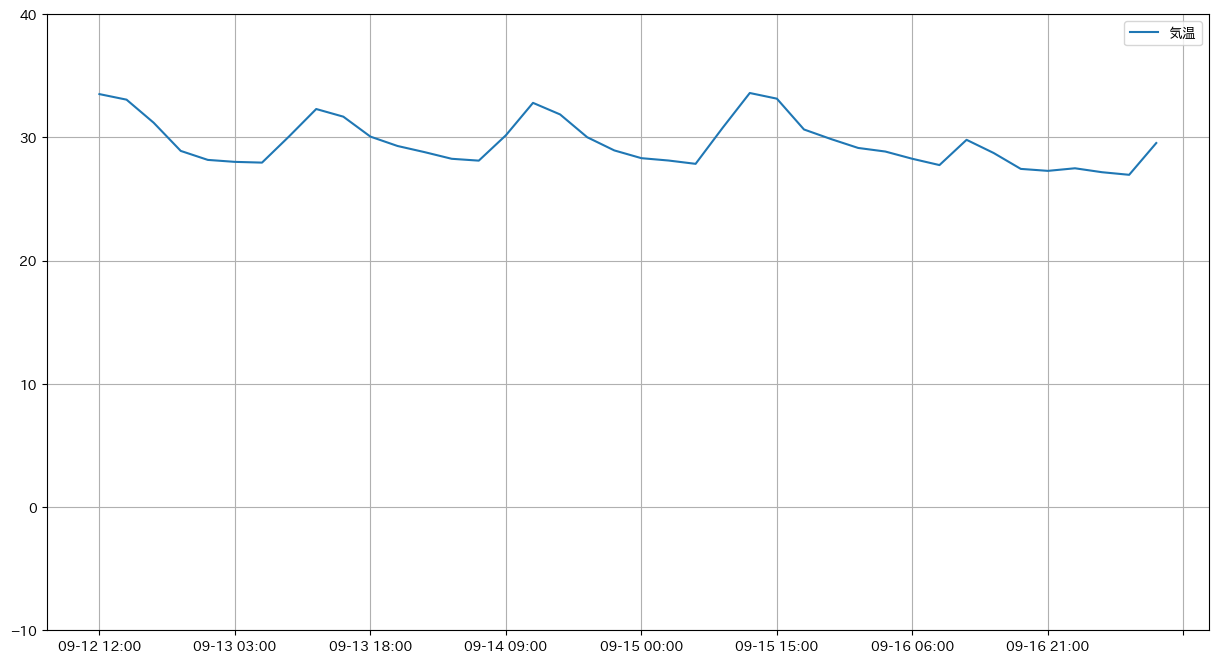

In [38]:
# 他の書き方
import requests
import json
from pprint import pprint
from datetime import datetime, timedelta, timezone
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib

# 5日間(3時間ごと)の天気を取得する：東京
url = 'https://api.openweathermap.org/data/2.5/forecast?q={city}&appid={key}&lang=ja&units=metric'
url = url.format(city='Tokyo,JP',
                 key='取得したAPIキー')

temps = []
# weathers = []
times = []

jsondata = requests.get(url).json()
# df = pd.DataFrame(columns=['気温', '天気'])
tz = timezone(timedelta(hours=+9), 'JST')
for dat in jsondata['list']:
    jst = str(datetime.fromtimestamp(dat['dt'], tz))[5:-9]
    weather = dat['weather'][0]['description']
    temp = dat['main']['temp']
    # df.loc[jst] = temp
    # print('日時:{jst}, 天気:{w}, 気温:{t}'.format(jst=jst, w=weather, t=temp))
    temps.append(temp)
    # weathers.append(weather)
    times.append(jst)

df = pd.DataFrame({'気温':temps}, index=times)
df.plot(figsize=(15, 8))
plt.ylim(-10, 40)
plt.grid()
plt.show()